In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
import pandas as pd
import glob, os
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt

In [2]:
평가데이터2 = pd.read_csv("평가데이터2.csv").set_index("일자")
평가데이터1 = pd.read_csv("평가데이터1.csv").set_index("일자")

배출량_행정동1 = pd.read_csv("평가데이터(처리)1.csv",encoding="cp949")
배출량_행정동2 = pd.read_csv("평가데이터(처리)2.csv")

In [5]:
배출량_행정동1[(배출량_행정동1["일자"] == "2020-10-23")]

,일자,행정동명,배출량
37962,2020-10-23,건입동,1073400
37963,2020-10-23,남원읍,1629750
37964,2020-10-23,노형동,6834250
37965,2020-10-23,대륜동,1067500
37966,2020-10-23,대정읍,3210150
37967,2020-10-23,대천동,1658000
37968,2020-10-23,도두동,480250
37969,2020-10-23,동홍동,2531400
37970,2020-10-23,봉개동,443850
37971,2020-10-23,삼도1동,1714000


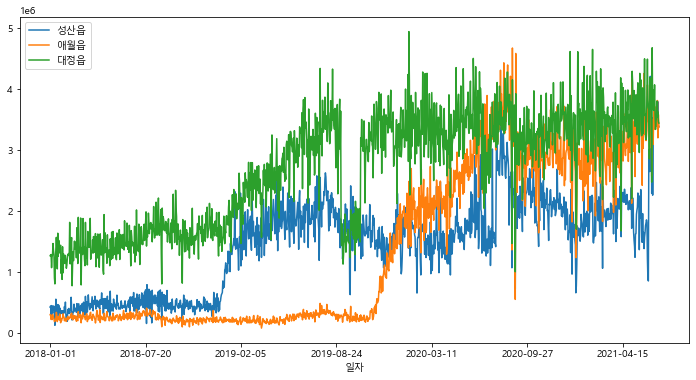

In [8]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
평가데이터1["성산읍"].plot(ax=ax)
평가데이터1["애월읍"].plot(ax=ax)
평가데이터1["대정읍"].plot(ax=ax)
plt.legend()

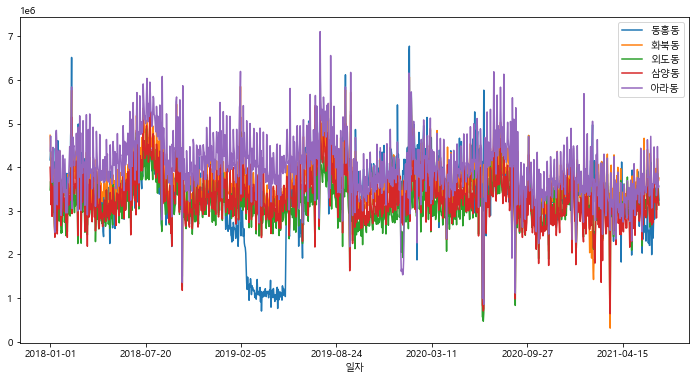

In [7]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
평가데이터1["동홍동"].plot(ax=ax)
평가데이터1["화북동"].plot(ax=ax)
평가데이터1["외도동"].plot(ax=ax)
평가데이터1["삼양동"].plot(ax=ax)
평가데이터1["아라동"].plot(ax=ax)
plt.legend()

# DTW 알고리즘 군집화
- 배출량 패턴이 유사한 행정동끼리 매핑하기 행정동1 내에서

In [29]:
평가데이터1 = pd.read_csv("평가데이터1.csv").set_index("일자")
data = pd.read_csv("최종 전처리완료.csv")

배출량_행정동1 = pd.read_csv("평가데이터(처리)1.csv",encoding="cp949")

행정동1 = ['건입동', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동',
       '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', "애월읍",'연동',
       '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '이도1동', '이도2동', '이호동',
       '일도1동', '일도2동', '정방동', '중문동', '중앙동', '천지동', '표선면', '화북동', '효돈동']

data_행정동1 = pd.concat([data[data["행정동명"] == i] for i in 행정동1],axis=0).reset_index(drop=True)
data_행정동1 = pd.merge(data_행정동1,배출량_행정동1,on = ["일자","행정동명"],how="inner")

In [4]:
def make_3dim_array(X1):
    X1_df = X1
    res = []
    for i in X1_df.columns:
        res.append(pd.concat([X1_df[i]],axis=1))
    return np.stack(res)

In [5]:
def elbow_dtw(data):
    SSE = []
    for i in range(1,11):
        model_elec = TimeSeriesKMeans(n_clusters=i,metric='dtw',max_iter=30,tol=1e-06, n_init=1,max_iter_barycenter=100,
                             metric_params=None,n_jobs=-1,dtw_inertia=False, verbose=0,
                             random_state=0,init='k-means++')
        model_elec.fit(data)
        SSE.append(np.round(model_elec.inertia_,3))

    plt.plot(range(1,11),SSE,marker="o",label="DTW",color="darkorange")
    plt.legend(loc="upper right")
    plt.title("DTW find best Cluster")
    plt.show()

In [37]:
평가데이터1_no = 평가데이터1.drop("애월읍",axis=1)

In [40]:
평가데이터1_3dim_no = make_3dim_array(평가데이터1_no)

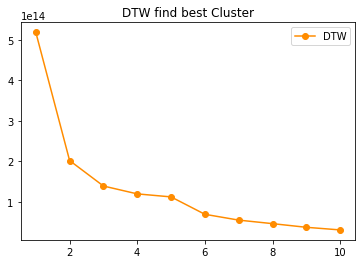

In [6]:
elbow_dtw(평가데이터1_3dim)

행정동 2 엘보우

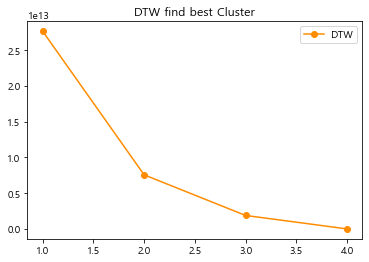

In [6]:
평가데이터2_3dim = make_3dim_array(평가데이터2)
elbow_dtw(평가데이터2_3dim)

행정동 2 실루엣

In [8]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
model = []
result = [] #,metric='dtw'
for i in range(3):
    model_배출량 = TimeSeriesKMeans(n_clusters=i+2,metric="dtw",max_iter=30,tol=1e-06, n_init=1,max_iter_barycenter=100,
                             metric_params=None,n_jobs=-1,dtw_inertia=False, verbose=0,
                             random_state=0,init='k-means++')
    model.append(model_배출량)
    배출량_result = model_배출량.fit_predict(평가데이터2_3dim)
    result.append(배출량_result)

    print("군집개수 : ",i+2,"개 실루엣점수 = ",silhouette_score(평가데이터2_3dim, 배출량_result, metric="dtw"))

군집개수 :  2 개 실루엣점수 =  0.6958858373434752
군집개수 :  3 개 실루엣점수 =  0.3474088734239372


ValueError: Number of labels is 4. Valid values are 2 to n_samples - 1 (inclusive)

### DTW 이용한 군집화

-  군집개수 :  3 개 실루엣점수 =  0.6104444722558136
- 군집개수 :  4 개 실루엣점수 =  0.4506185274285003
- 군집개수 :  5 개 실루엣점수 =  0.5071602671488339

애월읍 빼고 시각화

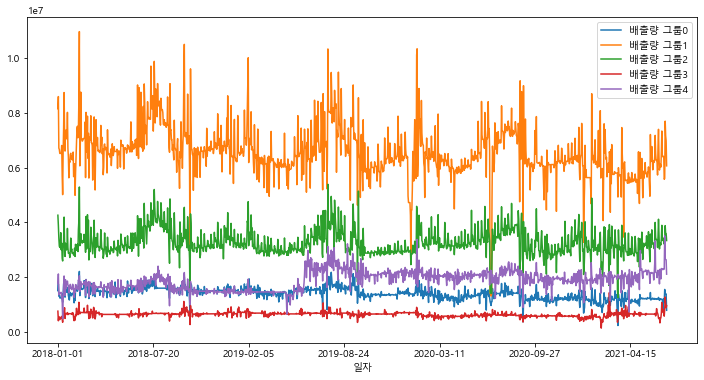

In [48]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
for i in range(5):
    df = pd.DataFrame(index=평가데이터1_no.index,columns=["배출량"],
                      data= model[2].cluster_centers_[i])
    (df.iloc[:,0]).plot(ax=ax,label="배출량 그룹" +str(i))
    #ax[i].set_ylim([0,1])
    ax.legend()


애월읍 뺀 군집 각각 그릭

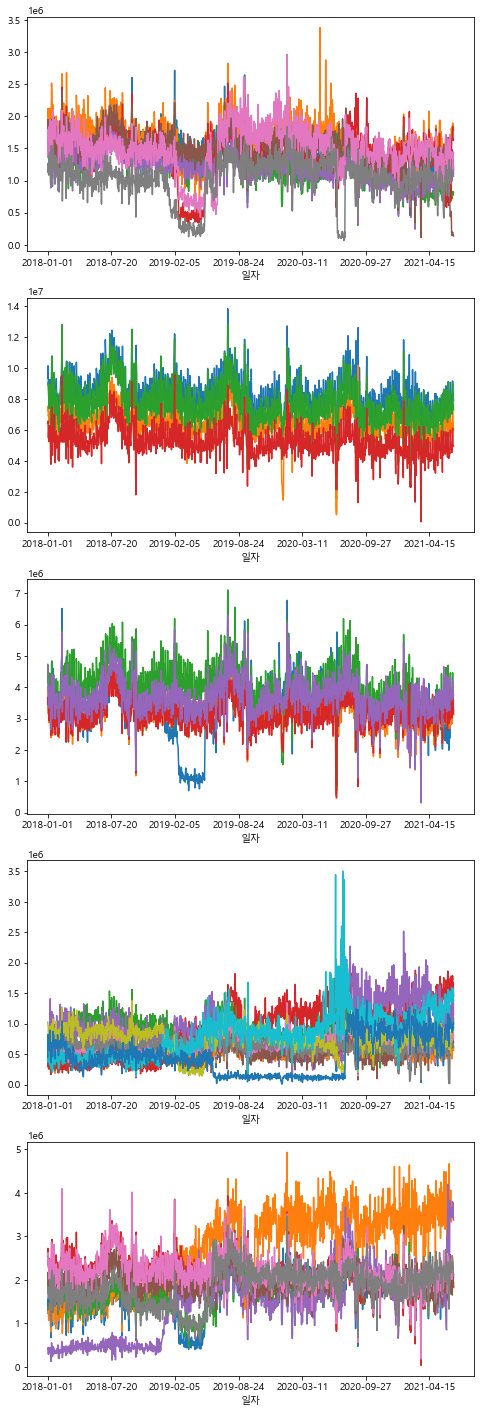

In [50]:
fig,ax = plt.subplots(5,1,figsize=(8,25))
for j in range(5):
    for i in 군집label5[군집label5['label'] == j].index:
        평가데이터1_no[i].plot(ax=ax[j])


In [49]:
군집label5= pd.DataFrame(index = 평가데이터1_no.columns, data = result[2],columns = ["label"])
군집label5["label"].value_counts()

3    11
0     8
4     8
2     5
1     4
Name: label, dtype: int64

In [41]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
model = []
result = [] #,metric='dtw'
for i in range(3):
    model_배출량 = TimeSeriesKMeans(n_clusters=i+3,metric="dtw",max_iter=30,tol=1e-06, n_init=1,max_iter_barycenter=100,
                             metric_params=None,n_jobs=-1,dtw_inertia=False, verbose=0,
                             random_state=0,init='k-means++')
    model.append(model_배출량)
    배출량_result = model_배출량.fit_predict(평가데이터1_3dim_no)
    result.append(배출량_result)

    print("군집개수 : ",i+3,"개 실루엣점수 = ",silhouette_score(평가데이터1_3dim_no, 배출량_result, metric="dtw"))

군집개수 :  3 개 실루엣점수 =  0.6261969344321686
군집개수 :  4 개 실루엣점수 =  0.47983136274328886
군집개수 :  5 개 실루엣점수 =  0.3780773936285043


In [ ]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
model = []
result = [] #,metric='dtw'
for i in range(4):
    model_배출량 = TimeSeriesKMeans(n_clusters=i+3,metric="dtw",max_iter=30,tol=1e-06, n_init=1,max_iter_barycenter=100,
                             metric_params=None,n_jobs=-1,dtw_inertia=False, verbose=0,
                             random_state=0,init='k-means++')
    model.append(model_배출량)
    배출량_result = model_배출량.fit_predict(평가데이터1_3dim)
    result.append(배출량_result)

    print("군집개수 : ",i+3,"개 실루엣점수 = ",silhouette_score(평가데이터1_3dim, 배출량_result, metric="dtw"))

#### 군집 4개짜리 시각화

0    16
3    11
2     6
1     4
Name: label, dtype: int64

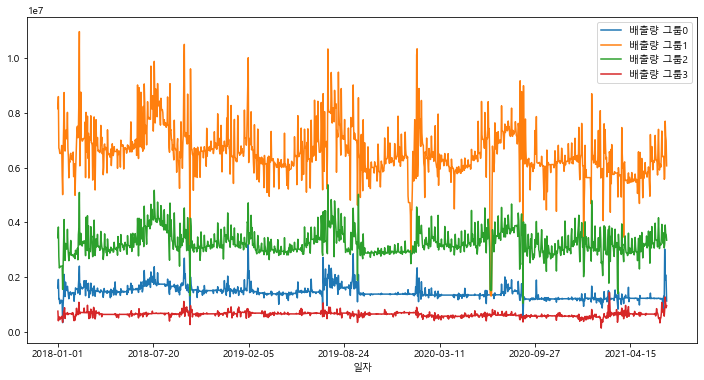

In [24]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
for i in range(4):
    df = pd.DataFrame(index=평가데이터1.index,columns=["배출량"],
                      data= model[1].cluster_centers_[i])
    (df.iloc[:,0]).plot(ax=ax,label="배출량 그룹" +str(i))
    #ax[i].set_ylim([0,1])
    ax.legend()
군집label4 = pd.DataFrame(index = 평가데이터1.columns, data = result[1],columns = ["label"])
군집label4["label"].value_counts()

4개 각각 시각화

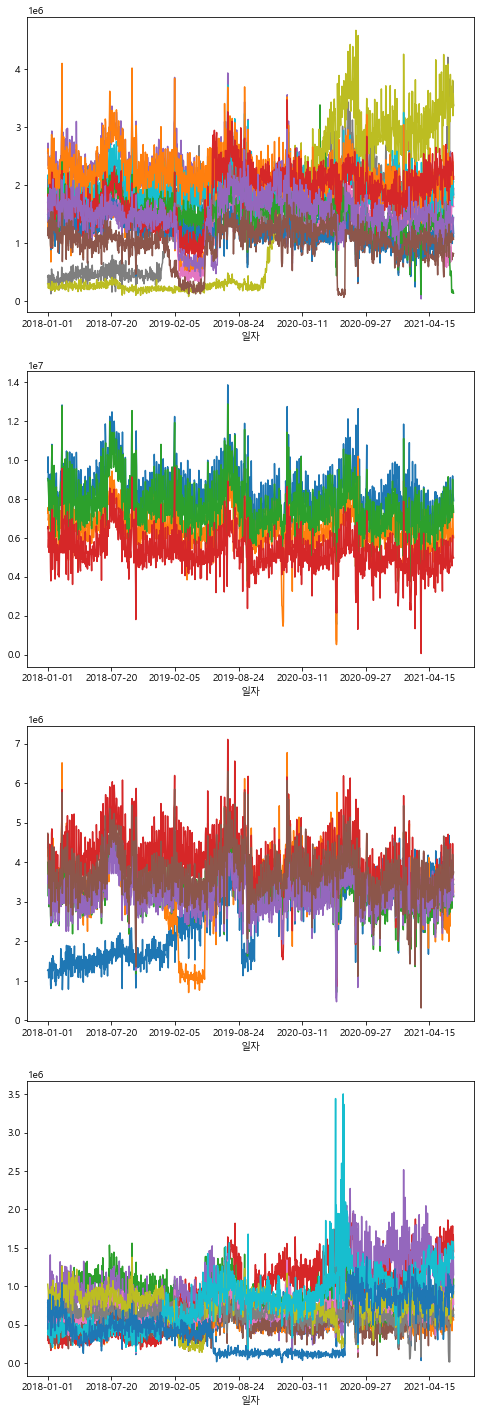

In [30]:
fig,ax = plt.subplots(4,1,figsize=(8,25))
for j in range(4):
    for i in 군집label4[군집label4['label'] == j].index:
        평가데이터1[i].plot(ax=ax[j])

3개짜리 시각화

0    27
2     6
1     4
Name: label, dtype: int64

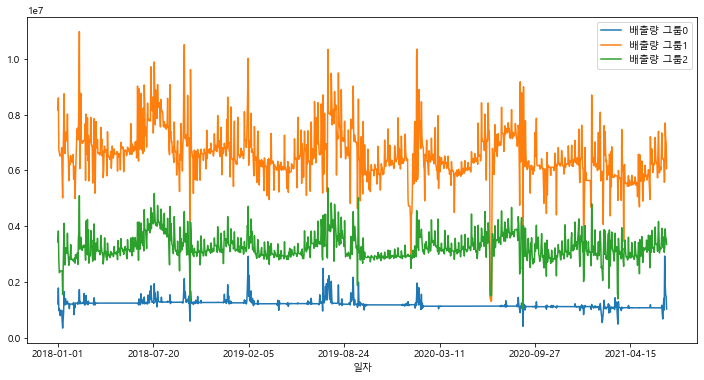

In [56]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
for i in range(3):
    df = pd.DataFrame(index=평가데이터1.index,columns=["배출량"],
                      data= model[0].cluster_centers_[i])
    (df.iloc[:,0]).plot(ax=ax,label="배출량 그룹" +str(i))
    #ax[i].set_ylim([0,1])
    ax.legend()
군집label3 = pd.DataFrame(index = 평가데이터1.columns, data = result[0],columns = ["label"])
군집label3["label"].value_counts()

In [27]:
행정동1_군집4개label = pd.read_csv("행정동1 군집화 label4.csv")

label0_4 = 행정동1_군집4개label[행정동1_군집4개label["label"] == 0]["행정동명"].values
label1_4 = 행정동1_군집4개label[행정동1_군집4개label["label"] == 1]["행정동명"].values
label2_4 = 행정동1_군집4개label[행정동1_군집4개label["label"] == 2]["행정동명"].values
label3_4 = 행정동1_군집4개label[행정동1_군집4개label["label"] == 3]["행정동명"].values

In [35]:
print("4개로 군집화 시, 군집 0번에 대한 예측성능",get_label예측(label0_4))
print("4개로 군집화 시, 군집 1번에 대한 예측성능",get_label예측(label1_4))
print("4개로 군집화 시, 군집 2번에 대한 예측성능",get_label예측(label2_4))
print("4개로 군집화 시, 군집 3번에 대한 예측성능",get_label예측(label3_4))

 - - - - - -- - - - - - - -
RMSLE : 0.120, RMSE : 129826.929, MAE : 95492.832
4개로 군집화 시, 군집 0번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.096, RMSE : 439093.746, MAE : 307758.838
4개로 군집화 시, 군집 1번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.094, RMSE : 267070.939, MAE : 193825.918
4개로 군집화 시, 군집 2번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.165, RMSE : 97379.703, MAE : 67472.207
4개로 군집화 시, 군집 3번에 대한 예측성능 None


In [39]:
label0_4

array(['건입동', '용담1동', '용담2동', '성산읍', '서홍동', '이도1동', '삼도2동', '삼도1동', '애월읍',
       '중문동', '대천동', '중앙동', '대륜동', '천지동', '남원읍', '오라동'], dtype=object)

In [40]:
label1_4

array(['일도2동', '이도2동', '연동', '노형동'], dtype=object)

In [37]:
label2_4

array(['외도동', '아라동', '대정읍', '삼양동', '화북동', '동홍동'], dtype=object)

In [36]:
label3_4

array(['영천동', '표선면', '도두동', '정방동', '이호동', '봉개동', '송산동', '안덕면', '예래동',
       '일도1동', '효돈동'], dtype=object)

In [48]:
list1 = ["성산읍","애월읍","대정읍","남원읍"]

In [49]:
list2 =  ['건입동', '노형동', '대륜동', '대천동', '도두동', '동홍동', '봉개동',
       '삼도1동', '삼도2동', '삼양동', '서홍동', '송산동', '아라동', '안덕면', '연동',
       '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '이도1동', '이도2동', '이호동',
       '일도1동', '일도2동', '정방동', '중문동', '중앙동', '천지동', '표선면', '화북동', '효돈동']

In [50]:
print("2개로 군집화 시, 군집 0번에 대한 예측성능",get_label예측(list1))
print("2개로 군집화 시, 군집 1번에 대한 예측성능",get_label예측(list2))

 - - - - - -- - - - - - - -
RMSLE : 0.143, RMSE : 200991.126, MAE : 140944.671
2개로 군집화 시, 군집 0번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.127, RMSE : 185869.677, MAE : 116853.397
2개로 군집화 시, 군집 1번에 대한 예측성능 None


In [51]:
list1 = ["애월읍","대정읍","남원읍"]

list2 =  ['건입동', '노형동', '대륜동', '대천동', "성산읍",'도두동', '동홍동', '봉개동',
       '삼도1동', '삼도2동', '삼양동', '서홍동', '송산동', '아라동', '안덕면', '연동',
       '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '이도1동', '이도2동', '이호동',
       '일도1동', '일도2동', '정방동', '중문동', '중앙동', '천지동', '표선면', '화북동', '효돈동']

print("2개로 군집화 시, 군집 0번에 대한 예측성능",get_label예측(list1))
print("2개로 군집화 시, 군집 1번에 대한 예측성능",get_label예측(list2))

 - - - - - -- - - - - - - -
RMSLE : 0.146, RMSE : 212208.423, MAE : 142467.856
2개로 군집화 시, 군집 0번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.151, RMSE : 202147.232, MAE : 123215.494
2개로 군집화 시, 군집 1번에 대한 예측성능 None


In [55]:
list1 = ["애월읍","대정읍","남원읍","표선면","안덕면"]

list2 =  ['건입동', '노형동', '대륜동', '대천동', "성산읍",'도두동', '동홍동', '봉개동',
       '삼도1동', '삼도2동', '삼양동', '서홍동', '송산동', '아라동', '연동',
       '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '이도1동', '이도2동', '이호동',
       '일도1동', '일도2동', '정방동', '중문동', '중앙동', '천지동', '화북동', '효돈동']

print("2개로 군집화 시, 군집 0번에 대한 예측성능",get_label예측(list1))
print("2개로 군집화 시, 군집 1번에 대한 예측성능",get_label예측(list2))

 - - - - - -- - - - - - - -
RMSLE : 0.140, RMSE : 169206.070, MAE : 114564.079
2개로 군집화 시, 군집 0번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.133, RMSE : 185670.429, MAE : 120935.529
2개로 군집화 시, 군집 1번에 대한 예측성능 None


<AxesSubplot:xlabel='일자'>

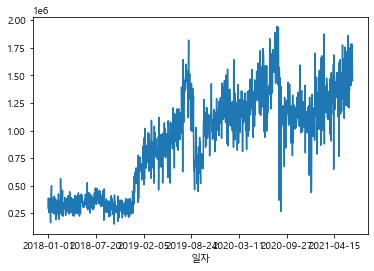

In [54]:
평가데이터1["안덕면"].plot()

In [3]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def eval_reg(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
  #  print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:,.3f}".format(rmsle_val,rmse_val,mae_val))
    return rmsle_val,rmse_val,mae_val

In [13]:
from lightgbm import LGBMRegressor
def get_label예측(행정동리스트):
    data_ = pd.concat([data_행정동1[data_행정동1["행정동명"] == i] for i in 행정동리스트],axis=0).reset_index(drop=True)
    Y = data_["배출량"]
    #Y = np.log1p(Y)
    predictors = ['건설이후(일)', '연배출금액편차', '연_월간식결제건수비율', '연_요일평균배출금액', '월_일별배출량비율', '요일부페결제건수', '연_요일배출건수편차', '연_월결제건수_농축수산물', '월_일평균배출량', '요일배달결제건수', '일강수량', '남자인구수_계_비율', '일강수량월평균', '연평균배출량', '연배출건수편차', '일강수량월편차', '요일간식결제건수', '연_월결제금액_배달', '연_월결제금액_간식', '장기1거주표준편차', '연_월결제금액_패스트푸드', '연_월결제건수_패스트푸드', '연_월마트/슈퍼마켓결제건수비율', '확진자수', '요일별배출금액비율', '여자인구수_15 0 64세_비율', '연_월결제건수_주점및주류판매', '연평균배출금액', '연_월패스트푸드결제금액비율', '남자인구수_15 0 64세_비율', '연평균배출건수', '총인구수_0 0 14세_비율', '내국인_목적별 0 회의및업무', '숙박시설', '연_월결제금액_부페', '내국인_목적별 0 휴양및관람', '연_월결제금액_양식', '연배출량편차', '방문표준편차', '월별예상승객총합', '남자인구수_65 0 100+_비율', '연_월농축수산물결제건수비율', '지방세', '요일아시아음식결제건수', '남여 비율', '장기2거주표준편차', '연_월결제금액_농축수산물', '연_월결제건수_식품', '내국인_행태별 0 부분패키지', '내국인_행태별 0 패키지', '최저기온월편차', '월평균결제건수', '월결제금액편차', '연_월식품결제금액비율', '내국인_목적별 0 레저스포츠', '평균기온월편차', '연_월결제건수_아시아음식', '연_월결제건수_마트/슈퍼마켓', '연_월결제건수_부페', '월평균배출량', '연_월양식결제건수비율', '남자인구수_0 0 14세_비율', '장기1방문편차', '연휴다음날', '월_일별결제건수비율', '월배출금액편차', '월_일배출금액편차', '연_월패스트푸드결제건수비율', '연평균1회결제금액', '연_월결제금액_한식', '연_월부페결제건수비율', '연_월배달결제금액비율', '연_월한식결제금액비율', '단기4방문편차', '연_월결제금액_식품', '요일간식결제건수비율', '요일아시아음식결제건수비율', '요일농축수산물결제금액', '일별예상승객편차', '요일패스트푸드결제건수비율', '연_요일평균배출량', '고용률', '내국인_합계', '최고 기온', '방문편차', '장기4방문편차', '연_월식품결제건수비율', '여자인구수_0 0 14세_비율', '월평균결제금액', '요일식품결제건수', '월배출건수편차', '연_월한식결제건수비율', '연_월배달결제건수비율', '여자인구수_0 0 14세', '총인구수_0 0 14세', '실업률', '내국인_목적별 0 교육여행', '장기4방문표준편차', '월평균1회결제금액', '연_월결제금액_아시아음식', '연_월아시아음식결제금액비율', '월별예상승객편차', '연_월부페결제금액비율', '월평균배출금액', '남자인구수_계', '연_월양식결제금액비율', '연_월결제금액_주점및주류판매', '요일부페결제금액비율', '월배출량편차', '총인구수_15 0 64세', '장기4일편차', '인구밀도', '월_일평균결제금액', '요일아시아음식결제금액비율', '장기2방문편차', '요일배달결제건수비율', '연휴전날', '연_월주점및주류판매결제건수비율', '월_일별배출건수비율', '월_일평균배출건수', '월_일별배출금액비율', '연_월결제건수비율', 'NO2', '월_일결제건수편차', '최고기온월편차', '일표준편차', 'SO2', '장기3거주편차', '장기1일편차', '장기2일편차', '요일배달결제금액비율', '요일간식결제금액비율', '요일배출량편차', '요일별배출량비율', '장기2거주편차', '장기3방문편차', '장기3방문표준편차','장기4거주표준편차', '단기2방문편차', '요일패스트푸드결제건수', '요일부페결제건수비율', 'PM10', '연_월간식결제금액비율', '남자인구수_0 0 14세', '단기2방문표준편차',
                  '연휴', '일결제건수편차']
    #X = data_.drop(["일자","행정시","배출량"],axis=1).reset_index(drop=True)
    X_1 = pd.get_dummies(data_[["년","월","일","요일","분기","행정동명"]],
                         columns = ["년","월","일","요일","분기","행정동명"])
    X_2 = data_[predictors]
    X = pd.concat([X_1,X_2],axis=1)
    
    x_train,x_test,y_train,y_test = train_test_split(X.values,Y,test_size=0.2,random_state=0)
    lgbm_reg = LGBMRegressor(n_estimators=500)
    model = lgbm_reg
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    rmsle_val,rmse_val,mae_val = eval_reg(y_test,pred)
    print(" - - - - - -- - - - - - - -")
    print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val,rmse_val,mae_val))

In [14]:
get_label예측(["성산읍","애월읍","대정읍"])

 - - - - - -- - - - - - - -
RMSLE : 0.152, RMSE : 220004.257, MAE : 150465.992


In [15]:
from lightgbm import LGBMRegressor
def get_label예측(행정동리스트):
    data_ = pd.concat([data_행정동1[data_행정동1["행정동명"] == i] for i in 행정동리스트],axis=0).reset_index(drop=True)
    Y = data_["배출량"]
    #Y = np.log1p(Y)
    predictors = ['건설이후(일)', '연배출금액편차', '연_월간식결제건수비율', '연_요일평균배출금액', '월_일별배출량비율', '요일부페결제건수', '연_요일배출건수편차', '연_월결제건수_농축수산물', '월_일평균배출량', '요일배달결제건수', '일강수량', '남자인구수_계_비율', '일강수량월평균', '연평균배출량', '연배출건수편차', '일강수량월편차', '요일간식결제건수', '연_월결제금액_배달', '연_월결제금액_간식', '장기1거주표준편차', '연_월결제금액_패스트푸드', '연_월결제건수_패스트푸드', '연_월마트/슈퍼마켓결제건수비율', '확진자수', '요일별배출금액비율', '여자인구수_15 0 64세_비율', '연_월결제건수_주점및주류판매', '연평균배출금액', '연_월패스트푸드결제금액비율', '남자인구수_15 0 64세_비율', '연평균배출건수', '총인구수_0 0 14세_비율', '내국인_목적별 0 회의및업무', '숙박시설', '연_월결제금액_부페', '내국인_목적별 0 휴양및관람', '연_월결제금액_양식', '연배출량편차', '방문표준편차', '월별예상승객총합', '남자인구수_65 0 100+_비율', '연_월농축수산물결제건수비율', '지방세', '요일아시아음식결제건수', '남여 비율', '장기2거주표준편차', '연_월결제금액_농축수산물', '연_월결제건수_식품', '내국인_행태별 0 부분패키지', '내국인_행태별 0 패키지', '최저기온월편차', '월평균결제건수', '월결제금액편차', '연_월식품결제금액비율', '내국인_목적별 0 레저스포츠', '평균기온월편차', '연_월결제건수_아시아음식', '연_월결제건수_마트/슈퍼마켓', '연_월결제건수_부페', '월평균배출량', '연_월양식결제건수비율', '남자인구수_0 0 14세_비율', '장기1방문편차', '연휴다음날', '월_일별결제건수비율', '월배출금액편차', '월_일배출금액편차', '연_월패스트푸드결제건수비율', '연평균1회결제금액', '연_월결제금액_한식', '연_월부페결제건수비율', '연_월배달결제금액비율', '연_월한식결제금액비율', '단기4방문편차', '연_월결제금액_식품', '요일간식결제건수비율', '요일아시아음식결제건수비율', '요일농축수산물결제금액', '일별예상승객편차', '요일패스트푸드결제건수비율', '연_요일평균배출량', '고용률', '내국인_합계', '최고 기온', '방문편차', '장기4방문편차', '연_월식품결제건수비율', '여자인구수_0 0 14세_비율', '월평균결제금액', '요일식품결제건수', '월배출건수편차', '연_월한식결제건수비율', '연_월배달결제건수비율', '여자인구수_0 0 14세', '총인구수_0 0 14세', '실업률', '내국인_목적별 0 교육여행', '장기4방문표준편차', '월평균1회결제금액', '연_월결제금액_아시아음식', '연_월아시아음식결제금액비율', '월별예상승객편차', '연_월부페결제금액비율', '월평균배출금액', '남자인구수_계', '연_월양식결제금액비율', '연_월결제금액_주점및주류판매', '요일부페결제금액비율', '월배출량편차', '총인구수_15 0 64세', '장기4일편차', '인구밀도', '월_일평균결제금액', '요일아시아음식결제금액비율', '장기2방문편차', '요일배달결제건수비율', '연휴전날', '연_월주점및주류판매결제건수비율', '월_일별배출건수비율', '월_일평균배출건수', '월_일별배출금액비율', '연_월결제건수비율', 'NO2', '월_일결제건수편차', '최고기온월편차', '일표준편차', 'SO2', '장기3거주편차', '장기1일편차', '장기2일편차', '요일배달결제금액비율', '요일간식결제금액비율', '요일배출량편차', '요일별배출량비율', '장기2거주편차', '장기3방문편차', '장기3방문표준편차','장기4거주표준편차', '단기2방문편차', '요일패스트푸드결제건수', '요일부페결제건수비율', 'PM10', '연_월간식결제금액비율', '남자인구수_0 0 14세', '단기2방문표준편차',
                  '연휴', '일결제건수편차']
    X = data_.drop(["일자","행정시","배출량"],axis=1).reset_index(drop=True)
    X = pd.get_dummies(X,columns = ["년","월","일","요일","분기","행정동명"])

    x_train,x_test,y_train,y_test = train_test_split(X.values,Y,test_size=0.2,random_state=0)
    lgbm_reg = LGBMRegressor(n_estimators=500)
    model = lgbm_reg
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    rmsle_val,rmse_val,mae_val = eval_reg(y_test,pred)
    print(" - - - - - -- - - - - - - -")
    print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val,rmse_val,mae_val))

In [16]:
get_label예측(["성산읍","애월읍","대정읍"])

 - - - - - -- - - - - - - -
RMSLE : 0.154, RMSE : 221375.907, MAE : 154130.519


### 상관관계 확인

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = X.corr(method='pearson')

plt.figure(figsize=(18, 12))
sns.heatmap(corr_df, annot=True)
plt.show()

In [18]:
X = data_행정동1.drop(["일자","행정시","배출량"],axis=1).reset_index(drop=True)
X = pd.get_dummies(X,columns = ["년","월","일","요일","분기","행정동명"])

In [19]:
X

,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,동.식물관련시설,...,행정동명_이호동,행정동명_일도1동,행정동명_일도2동,행정동명_정방동,행정동명_중문동,행정동명_중앙동,행정동명_천지동,행정동명_표선면,행정동명_화북동,행정동명_효돈동
0,849,4324,2.27,1.08,219,24,41,55,50,0,...,0,0,0,0,0,0,0,0,0,0
1,849,4324,2.27,1.08,219,24,41,55,50,0,...,0,0,0,0,0,0,0,0,0,0
2,849,4324,2.27,1.08,219,24,41,55,50,0,...,0,0,0,0,0,0,0,0,0,0
3,849,4324,2.27,1.08,219,24,41,55,50,0,...,0,0,0,0,0,0,0,0,0,0
4,849,4324,2.27,1.08,219,24,41,55,50,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47244,355,2316,2.27,1.02,1353,395,119,122,64,3,...,0,0,0,0,0,0,0,0,0,1
47245,355,2316,2.27,1.02,1353,395,119,122,64,3,...,0,0,0,0,0,0,0,0,0,1
47246,355,2316,2.27,1.02,1353,395,119,122,64,3,...,0,0,0,0,0,0,0,0,0,1
47247,355,2316,2.27,1.02,1353,395,119,122,64,3,...,0,0,0,0,0,0,0,0,0,1


In [27]:
data[["총인구수_계","행정동명"]].value_counts()

label5 = pd.read_csv("행정동1 군집화 label5.csv")
test = pd.merge(label5,data[["총인구수_계","행정동명"]],on="행정동명",how="left")

#.to_csv("test.csv",encoding="utf-8-sig",index=False)

In [30]:
test_ = test.groupby(["행정동명","label"]).agg({"총인구수_계":"mean"})
test_["총인구수_계"] = test_["총인구수_계"].astype(int) 

In [36]:
test_.sort_values(["label"]).to_csv("label 인구.csv",encoding="utf-8-sig")

In [40]:
test_2 = test_.sort_values(["label"]).groupby("label").agg({"총인구수_계":"mean"})
test_2["총인구수_계"] = test_2["총인구수_계"].astype(int) 

In [41]:
test_2

,총인구수_계
label,
0,11491
1,44866
2,25855
3,5352
4,24294


In [2]:
data = pd.read_csv("최종 전처리완료.csv")
배출량_행정동1 = pd.read_csv("평가데이터(처리)1.csv",encoding="cp949")
평가데이터1 = pd.read_csv("평가데이터1.csv").set_index("일자")

행정동1 = ['건입동', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동',
       '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동',
       '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '이도1동', '이도2동', '이호동',
       '일도1동', '일도2동', '정방동', '중문동', '중앙동', '천지동', '표선면', '화북동', '효돈동']

data_행정동1 = pd.concat([data[data["행정동명"] == i] for i in 행정동1],axis=0).reset_index(drop=True)
data_행정동1 = pd.merge(data_행정동1,배출량_행정동1,on = ["일자","행정동명"],how="inner")

In [4]:
data_행정동1.to_csv("최종 전처리 완료 행정동1.csv",encoding="utf-8-sig",index=False)